In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os

base_path = "/g/stegle"

In [2]:
import gseapy as gp

In [2]:
def plot_vars_from_df(df, variables):
    plt.figure()

    for variable in variables:
        df_plot = df[df["variable"] == variable]
        plt.plot( df_plot["epoch"], df_plot["value"], label = variable)

    plt.legend()    
    plt.show()

In [3]:
log_path = "ueltzhoe/bicycle/notebooks/experiments/heart_organoids/plots/HEART-ORGANOID-TEST-3_celltypeCM_batchsize128_lyapunovpenaltyTrue_latentsTrue_swa0_seed3_0_3_0.001_1000_1.0_1.0_0.0_1.0_10.0_0/last_log_train.csv"
df = pd.read_csv(os.path.join(base_path,log_path))

In [4]:
df.variable.unique()

array(['train_kl_train', 'train_nll_train', 'train_loss', 'train_l1',
       'train_T', 'train_lyapunov'], dtype=object)

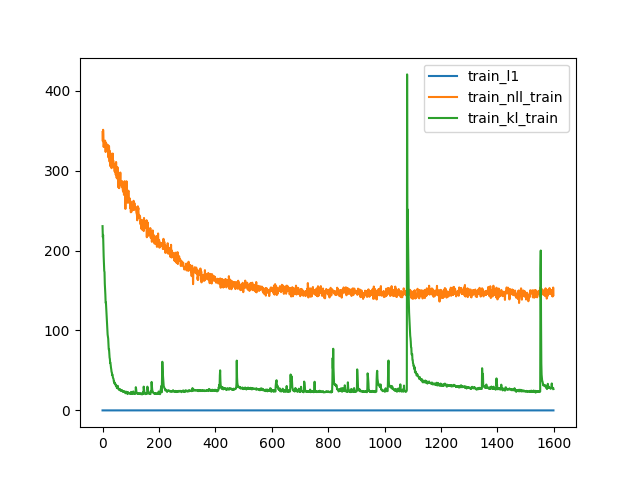

In [5]:
%matplotlib widget

variables = [
    "train_l1",
    "train_nll_train",
    "train_kl_train"
]

plot_vars_from_df(df, variables)

In [3]:
import pickle

gene_list_path = 'ueltzhoe/bicycle/notebooks/data_preprocessing/heart_organoids/genes_CM.pkl'

f = open(os.path.join(base_path,gene_list_path), 'rb' )

gene_list = pickle.load(f)

In [4]:
import numpy as np

estimated_path = "ueltzhoe/bicycle/notebooks/experiments/heart_organoids/plots/HEART-ORGANOID-TEST-4_celltypeCM_batchsize128_lyapunovpenaltyTrue_latentsTrue_swa0_seed4_0_4_0.001_1000_0.01_1.0_0.0_1.0_10.0_0/last_estimated_beta_epoch3350.npy"
estimated_beta = np.load(os.path.join(base_path,estimated_path))

# Apply threshold (optional)
#estimated_beta = np.abs(estimated_beta) > 5.0

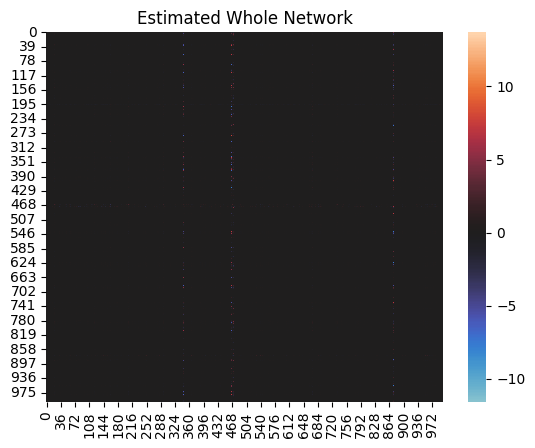

In [5]:
%matplotlib inline

import seaborn as sns

plt.figure()
plt.title("Estimated Whole Network")
sns.heatmap(estimated_beta[:,:],
            annot = False,
            annot_kws={"fontsize": 7},
            center=0,
            #cmap="vlag",
            #vmin = -10.0,
            #vmax = 10.0
           )
plt.show()

plt.close()

In [6]:
print('TOTAL SUM:',np.abs(estimated_beta).sum())

parents = estimated_beta.sum(axis = 0)
genes_sorted_by_parents = [{gene_list[i]: parents[i]} for i in np.argsort(-np.abs(parents)).squeeze().astype(int).tolist()]

children = estimated_beta.sum(axis = 1)
genes_sorted_by_children = [{gene_list[i]: children[i]} for i in np.argsort(-np.abs(children)).squeeze().astype(int).tolist()]

TOTAL SUM: 32165.736


In [7]:
genes_sorted_by_parents[:10]

[{'PACRG': -19.091438},
 {'KCNH5': 15.81451},
 {'KPNA2': 9.0909},
 {'AC099489.1': 9.087259},
 {'SV2C': 8.42249},
 {'AKAP6': -7.3162584},
 {'NECTIN3-AS1': -6.8074217},
 {'PPFIA2': -6.4320016},
 {'AC079052.1': -5.7216415},
 {'PAX3': -5.603344}]

In [8]:
genes_sorted_by_children[:10]

[{'MTRNR2L12': -202.11876},
 {'AL137244.1': -42.577187},
 {'HIST1H3J': -38.541054},
 {'PRKG1-AS1': -22.936243},
 {'FGF13': -19.593742},
 {'C4orf48': 15.883781},
 {'AP002989.1': 15.785597},
 {'AKAP6': 15.698111},
 {'AL732314.6': -15.331986},
 {'NPSR1': 15.194227}]

In [11]:
sum_thresh = 10.0

nodes_list = list(  
            set( [gene_list[i] for i,p in enumerate(parents) if abs(p) > sum_thresh ] +
                 [gene_list[i] for i,p in enumerate(children) if abs(p) > sum_thresh ] )
                 )

print(len(nodes_list))

77


In [12]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(gene_list=nodes_list, # or "./tests/data/gene_list.txt",
                 gene_sets=['KEGG_2021_Human'],#'MSigDB_Hallmark_2020','KEGG_2021_Human'],
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

In [13]:
enr.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,ECM-receptor interaction,3/88,0.004761,0.161887,0,0,9.461685,50.593707,SV2C;FN1;ITGA8
1,KEGG_2021_Human,Arrhythmogenic right ventricular cardiomyopathy,2/77,0.035550,0.420928,0,0,7.057067,23.548028,SGCD;ITGA8
2,KEGG_2021_Human,Hypertrophic cardiomyopathy,2/90,0.047137,0.420928,0,0,6.010606,18.360520,SGCD;ITGA8
3,KEGG_2021_Human,Dilated cardiomyopathy,2/96,0.052890,0.420928,0,0,5.625248,16.535642,SGCD;ITGA8
4,KEGG_2021_Human,Glycosaminoglycan degradation,1/19,0.070700,0.420928,0,0,14.550439,38.548565,HPSE2
